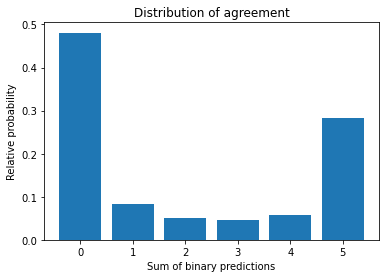

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:\\Users\\larsd\\OneDrive - TU Eindhoven\\Universiteit\\Jaar 3\\Kwartiel 3\\8P361 - Project Imaging\\Good data\\"
model_names = ["EfficientNet", "Inception", "ResNet", "MobileNetV2", "Xception"]

df0 = pd.read_csv(path+model_names[0]+"_submission.csv")
df0 = df0.rename(columns={'label': model_names[0]})

df1 = pd.read_csv(path+model_names[1]+"_submission.csv")
df1 = df1.rename(columns={'label': model_names[1]})

df2 = pd.read_csv(path+model_names[2]+"_submission.csv")
df2 = df2.rename(columns={'label': model_names[2]})

df3 = pd.read_csv(path+model_names[3]+"_submission.csv")
df3 = df3.rename(columns={'label': model_names[3]})

df4 = pd.read_csv(path+model_names[4]+"_submission.csv")
df4 = df4.rename(columns={'label': model_names[4]})

df = pd.merge(df0, df1)
df = pd.merge(df, df2)
df = pd.merge(df, df3)
df = pd.merge(df, df4)

for model in model_names:
    df.loc[df[model] < 0.5, model] = 0
    df.loc[df[model] >= 0.5, model] = 1
df = df.iloc[1:,1:].astype(int)
df

df["Sum"] = df["EfficientNet"] + df["Inception"] + df["ResNet"] + df["MobileNetV2"] + df["Xception"]

labels = [0,1,2,3,4,5]
sums = list(df["Sum"])

counts = []
for i in range(6):
    counts.append(sums.count(i)/len(sums))
plt.bar(labels,counts)
plt.title("Distribution of agreement")
plt.xlabel("Sum of binary predictions")
plt.ylabel("Relative probability")

plt.savefig("Distribution of agreement between models.png")